<div style="max-width:66ch;">

# Lecture notes - Convolutional Neural Networks (CNN)

This is the lecture note for **CNN**. 

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to CNN. I encourage you to read further about CNN. </p>

Read more:
- [Convolutional neural networks - wikipedia](https://en.wikipedia.org/wiki/Convolutional_neural_network)
- [Conv2D layer - keras](https://keras.io/api/layers/convolution_layers/convolution2d/)
- [CNN for visual recognition - CS231](https://cs231n.github.io/convolutional-networks/)
- [CIFAR10 - Krizhevsky et. al.](https://www.cs.toronto.edu/~kriz/cifar.html)
- [Convolutional neural nets - S. Amidi, CS230 MIT](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks#)

</div>


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


170498071/170498071 [==============================] - 8s 0us/step
X_train.shape=(50000, 32, 32, 3), X_test.shape=(10000, 32, 32, 3)
y_train.shape=(50000,), y_test.shape=(10000,)


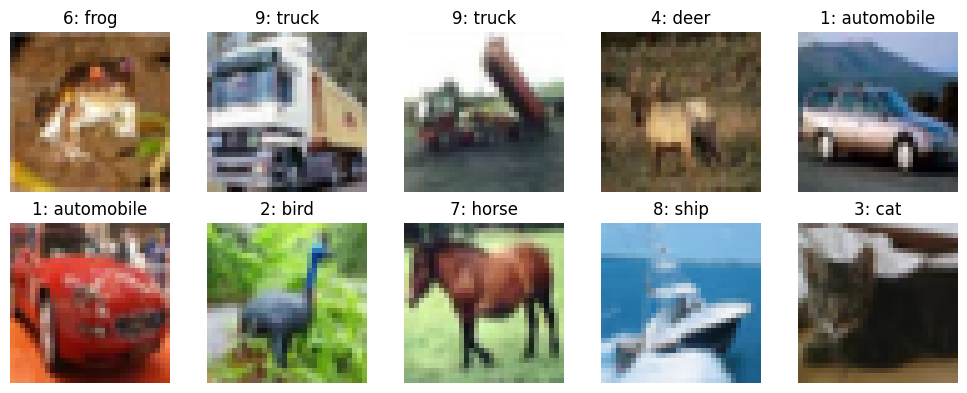

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data


(X_train, y_train), (X_test, y_test) = load_data()
y_train, y_test = y_train.ravel(), y_test.ravel()

labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

labels_dict = {i: label for i, label in enumerate(labels)}

print(f"{X_train.shape=}, {X_test.shape=}\n{y_train.shape=}, {y_test.shape=}")

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}: {labels[y_train[i]]}")
fig.tight_layout()


In [2]:
print(f"{X_train.min()=}, {X_train.max()=}")
# normalize to 0-1
scaled_X_train = X_train.astype("float32") / 255
scaled_X_test = X_test.astype("float32") / 255

X_train.min()=0, X_train.max()=255


<div style="max-width:66ch;">

## CNN model

</div>

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


def CNN_model(learning_rate=0.001, drop_rate=0.5, kernels=[32, 64]):

    print(drop_rate)
    # default learning rate in Adam
    adam = Adam(learning_rate=learning_rate)

    model = Sequential(name="CNN_model")

    for number_kernel in kernels:
        conv_layer = Conv2D(
            number_kernel,
            kernel_size=(3, 3),
            activation="relu",
            kernel_initializer="he_normal",
            input_shape=X_train.shape[1:],
        )

        model.add(conv_layer)
        # defaults to pool_size if None
        model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

    model.add(Flatten())
    model.add(Dropout(drop_rate))
    model.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
    model.add(Dense(10, activation="softmax"))

    model.compile(
        loss="sparse_categorical_crossentropy", optimizer=adam, metrics=["acc"]
    )

    return model

model = CNN_model(.001, .5, [32, 64, 32])

model.summary()


0.5
Model: "CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 32)        

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

# want to minimize monitored metric (val_loss)
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=15)

model.fit(
    scaled_X_train,
    y_train,
    epochs=100,
    callbacks=[early_stopper],
    validation_split=1 / 5,
)

Epoch 1/100
1250/1250 [==============================] - 9s 5ms/step - loss: 1.9369 - acc: 0.2664 - val_loss: 1.6206 - val_acc: 0.3915
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6133 - acc: 0.3990 - val_loss: 1.4145 - val_acc: 0.4843
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4539 - acc: 0.4634 - val_loss: 1.2981 - val_acc: 0.5336
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3517 - acc: 0.5068 - val_loss: 1.2115 - val_acc: 0.5741
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2762 - acc: 0.5346 - val_loss: 1.1312 - val_acc: 0.6034
Epoch 6/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2143 - acc: 0.5599 - val_loss: 1.1152 - val_acc: 0.6141
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1661 - acc: 0.5810 - val_loss: 1.0929 - val_acc: 0.6199
Epoch 8/100
1250/1250 [==============================] 

In [5]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,acc,val_loss,val_acc
0,1.936940,0.266425,1.620616,0.3915
1,1.613277,0.399025,1.414469,0.4843
2,1.453851,0.463425,1.298056,0.5336
3,1.351701,0.506800,1.211497,0.5741
4,1.276175,0.534575,1.131184,0.6034


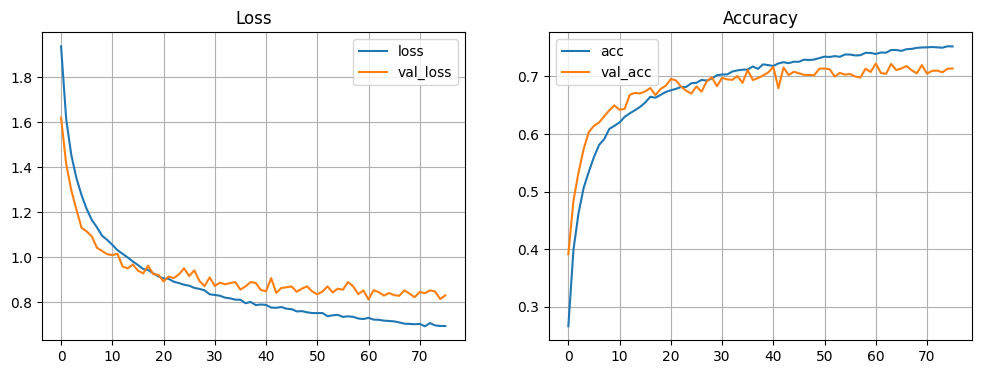

In [6]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True)
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True)

plot_metrics(metrics)

<div style="max-width:66ch;">

## Hyperparameter tuning 
We can tune several parameters, e.g.
- dropout rate
- learning rate
- different network configurations

For simplicity we only tune dropout rate here

</div>

In [7]:
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=5, restore_best_weights=True)


def evaluate_model(**kwargs):
    model = CNN_model(**kwargs)
    model.fit(
        scaled_X_train,
        y_train,
        validation_split=1 / 6,
        epochs=15,  # small epochs to make training faster
        callbacks=[early_stopper],
    )
    metrics = pd.DataFrame(model.history.history)

    val_acc = metrics["val_acc"].iloc[-1]
    return val_acc


In [8]:
dropout_accuracies = {}
for drop_rate in np.arange(.1, .6, .1):
    # because of floating point precision
    drop_rate = np.round(drop_rate,1) 
    dropout_accuracies[drop_rate] = evaluate_model(drop_rate = drop_rate)


0.1
Epoch 1/15
1303/1303 [==============================] - 7s 4ms/step - loss: 1.4196 - acc: 0.4952 - val_loss: 1.1735 - val_acc: 0.5821
Epoch 2/15
1303/1303 [==============================] - 5s 4ms/step - loss: 1.0505 - acc: 0.6318 - val_loss: 0.9960 - val_acc: 0.6547
Epoch 3/15
1303/1303 [==============================] - 5s 4ms/step - loss: 0.8882 - acc: 0.6889 - val_loss: 0.9286 - val_acc: 0.6807
Epoch 4/15
1303/1303 [==============================] - 5s 4ms/step - loss: 0.7470 - acc: 0.7402 - val_loss: 1.0046 - val_acc: 0.6619
Epoch 5/15
1303/1303 [==============================] - 5s 4ms/step - loss: 0.6299 - acc: 0.7802 - val_loss: 0.9247 - val_acc: 0.6931
Epoch 6/15
1303/1303 [==============================] - 5s 4ms/step - loss: 0.5169 - acc: 0.8181 - val_loss: 0.9223 - val_acc: 0.7053
Epoch 7/15
1303/1303 [==============================] - 5s 4ms/step - loss: 0.4224 - acc: 0.8530 - val_loss: 0.9615 - val_acc: 0.7073
Epoch 8/15
1303/1303 [==============================] - 5s

<Axes: title={'center': 'Tuning dropouts'}, xlabel='Dropouts', ylabel='Validation accuracy'>

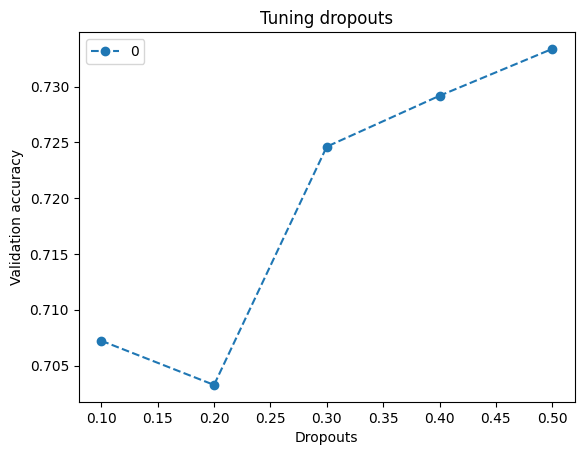

In [9]:
pd.DataFrame(dropout_accuracies.values(), index=dropout_accuracies.keys()).plot(
    title="Tuning dropouts", xlabel="Dropouts", ylabel="Validation accuracy", style = "--o"
)


## Train and evaluate on chosen model

In [12]:
# note that we can't use early stopping here as we will train on all training data and no validation
# don't use test data as validation data here 

model_final = CNN_model(drop_rate = .5)

model_final.fit(scaled_X_train, y_train, epochs = 20)



0.5
Epoch 1/20
1563/1563 [==============================] - 7s 3ms/step - loss: 1.4833 - acc: 0.4662
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1540 - acc: 0.5890
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0129 - acc: 0.6422
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9166 - acc: 0.6792
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8358 - acc: 0.7064
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7701 - acc: 0.7300
Epoch 7/20
1563/1563 [==============================] - 5s 4ms/step - loss: 0.7240 - acc: 0.7462
Epoch 8/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6787 - acc: 0.7621
Epoch 9/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6364 - acc: 0.7764
Epoch 10/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5991 - acc: 0.7874
Epoch 11/20
1563/1563 [==

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.79      0.72      1000
           1       0.88      0.85      0.86      1000
           2       0.62      0.56      0.59      1000
           3       0.49      0.59      0.54      1000
           4       0.62      0.68      0.65      1000
           5       0.70      0.56      0.62      1000
           6       0.75      0.78      0.77      1000
           7       0.77      0.71      0.73      1000
           8       0.81      0.81      0.81      1000
           9       0.85      0.77      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



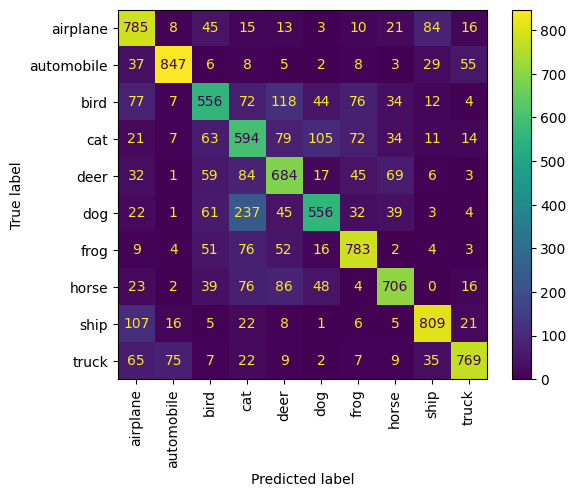

In [13]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

y_pred = model.predict(scaled_X_test)
#y_pred = np.argmax(y_pred)

y_pred = np.argmax(y_pred, axis = 1)


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.xticks(rotation = 90);

<div style="max-width:66ch;">

## Summary

In this lecture we've covered simple image processing using opencv and some convolutional kernels, which are the foundations to convolutional neural networks (CNN).

</div>

<div style="background-color: #FFF; color: #212121; border-radius: 1px; width:22ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1.5em 0; width: 70%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
<div>
</div>
